In [1]:
! echo y | apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following extra packages will be installed:
  fonts-liberation libxaw7 libxmu6
Suggested packages:
  gsfonts graphviz-doc
The following NEW packages will be installed:
  fonts-liberation graphviz libxaw7 libxmu6
0 upgraded, 4 newly installed, 0 to remove and 11 not upgraded.
Need to get 2004 kB of archives.
After this operation, 4658 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu/ trusty/main libxmu6 amd64 2:1.1.1-1 [53.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu/ trusty/main libxaw7 amd64 2:1.0.12-1 [168 kB]
Get:3 http://archive.ubuntu.com/ubuntu/ trusty/main fonts-liberation all 1.07.3-3 [1320 kB]
Get:4 http://archive.ubuntu.com/ubuntu/ trusty-updates/main graphviz amd64 2.36.0-0ubuntu3.1 [461 kB]
Fetched 2004 kB in 3s (573 kB/s)
Selecting previously unselected package libxmu6:amd64.
(Reading database ... 40414 files and directories currently installe

In [6]:
! pip install --upgrade pydot pydot2

You are using pip version 7.1.0, however version 7.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already up-to-date: setuptools in /usr/local/lib/python2.7/dist-packages (from pydot)
Requirement already up-to-date: pyparsing in /usr/local/lib/python2.7/dist-packages (from pydot)


In [8]:
import pydot
pydot.__version__

'1.0.29'

# Fix following code

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
events = pd.read_csv("~/data/train.csv")
the_event = events[events.event_id==54]
wires = pd.read_csv('~/data/wire_data.csv')
wires_cartesian = np.vstack((wires['wire_rho'] * np.cos(wires['wire_phi']),
                                  wires['wire_rho'] * np.sin(wires['wire_phi']))).T

In [15]:
# Select wires with a condition
signal_wires = the_event.label == 0
print signal_wires.shape
print signal_wires.sum()
print signal_wires.dtype
# So we have a boolean mask with 3639 positive values
print wires_cartesian[signal_wires, :].shape
# But it selects all the rows, we want only 3639

(4482,)
3639
bool
(4482, 2)


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:7: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


KeyError: 0

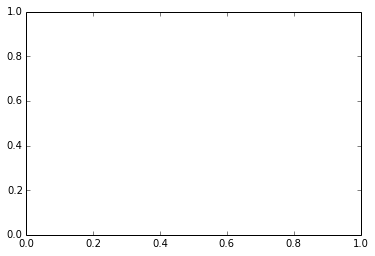

In [17]:
# Want a histogram of relative_time
fig, ax = plt.subplots()
ax.hist(the_event[the_event.relative_time > 100].relative_time)